In [1]:
import pandas as pd
import os

In [2]:
df1s = []
files = os.listdir('./data')
for i in files[:50]:
    df = pd.read_csv(f'data/{i}')
    df1 = df.copy()
    df1 = df1.iloc[1:]
    df1['current_acc'] = df['targetLateralAcceleration'][:-1].to_list()
    df1s.append(df1)

df1 = pd.concat(df1s)

In [3]:
import seaborn as sns

<Axes: >

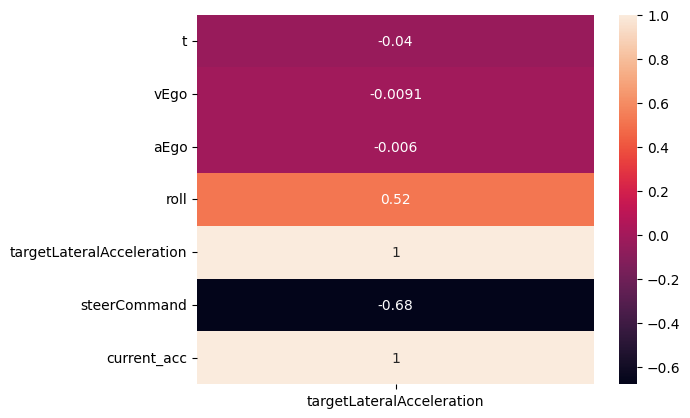

In [4]:
sns.heatmap(df1.corr()['targetLateralAcceleration'].to_frame(), annot=True)

In [5]:
df1['steerNeg'] = -df1['steerCommand']

<Axes: >

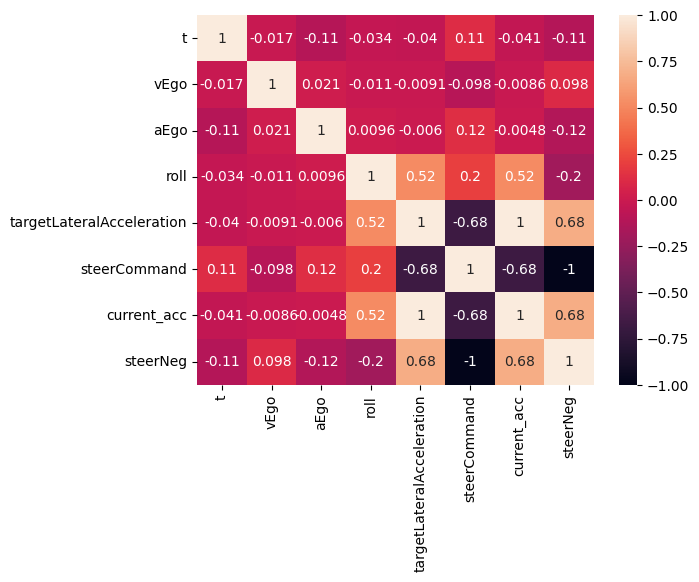

In [6]:
sns.heatmap(df1.corr(), annot=True)

<Axes: >

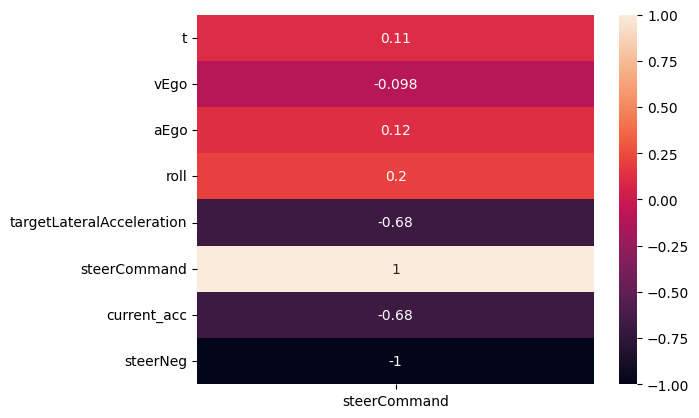

In [7]:
sns.heatmap(df1.corr()['steerCommand'].to_frame(), annot=True)

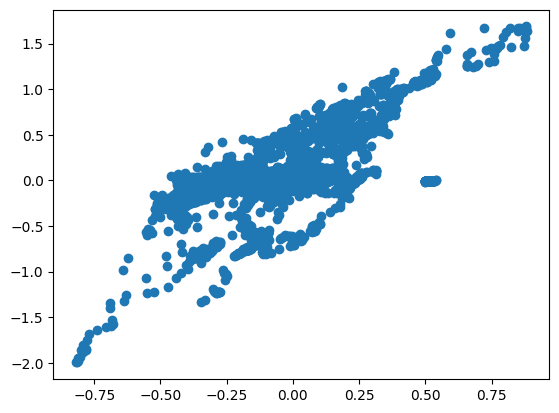

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df1['steerNeg'], df1['targetLateralAcceleration'])

0.5509778540351038

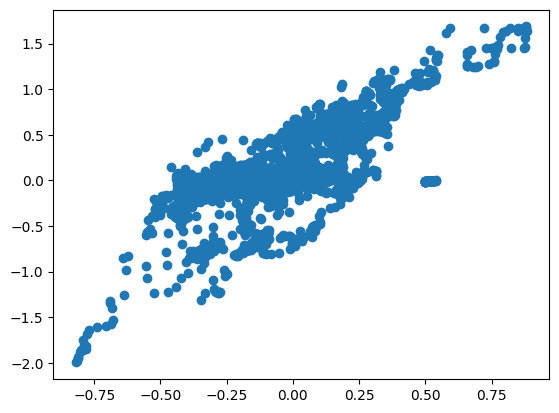

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X = np.concatenate([df1.dropna()['steerNeg'].to_numpy().reshape(-1, 1), df1.dropna()['current_acc'].to_numpy().reshape(-1, 1)**2, df1.dropna()['current_acc'].to_numpy().reshape(-1, 1)**3], axis=1)
X = df1.dropna()[['targetLateralAcceleration', 'vEgo', 'aEgo', 'roll', 'current_acc']].to_numpy()
y = df1.dropna()['steerCommand'].to_numpy()
model = SVR().fit(X, y)
model.score(X, y)
plt.scatter(df1.dropna()['steerNeg'], df1.dropna()['current_acc'])
# plt.plot(df1.dropna()['steerNeg'], model.predict(X), color='red')

r2_score(y, model.predict(X))

In [119]:
model.coef_, model.intercept_

(array([-6.94698262e-01, -9.38930813e-04,  7.57374868e-03,  5.86481740e+00,
         1.39425851e-01]),
 0.022765667450735792)

In [120]:
r2_score((X @ model.coef_.reshape(-1, ) + model.intercept_), y)

0.8178466577308106